# Lista 3: Execício 2

SEL0367 - Controle Adaptativo

> Aluno: Felipe Andrade Garcia Tommaselli- 11800910 

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.color_palette("rocket", as_cmap=True)

import control.matlab as matlab

Sistema (planta): $\dot{x} = \begin{pmatrix} a_{11} & a_{12} \\ a_{21} & a_{22}  \\ \end{pmatrix} \cdot x + \begin{pmatrix} b_1 \\ b_2 \end{pmatrix} \cdot u $

Parâmetros:
* Disponíveis: $x$, $u$
* Estimados: $a_{11}$, $a_{12}$, $a_{21}$, $a_{22}$, $b_{1}$, $b_{2}$


In [31]:
# Parametros
a11 = -5
a12 = 0.5
a21 = 0.7
a22 = -3
b1 = 1
b2 = 2.2

In [32]:
# Parâmetros de simulação
N = 30
dt = 0.01  # Taxa de amostragem
T = np.arange(0, N + dt, dt)

T.shape

(3001,)

In [33]:
# Definiçaõ de A e phi sendo variantes no tempo 
x = np.zeros((2, len(T)))
xdot = np.zeros((2, len(T)))
phi = np.zeros((6, len(T))) # xdots xs e us

# entrada 
u = 10 * np.sin(2 * T)

phi, x, xdot

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

Sendo xdot a derivada de x, temos que: 
$\dot{x} = x_{k+1} - x_{k}$ (derviada discreta)

operação de diferença finita do numpy: np.diff(x)


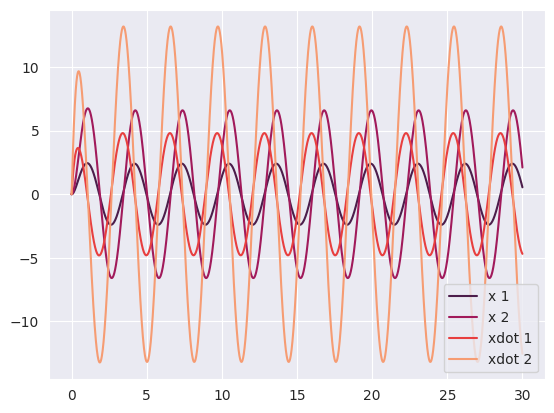

In [34]:
# Simulação
A = np.array([[a11, a12], [a21, a22]])

B = np.array([[b1], [b2]])

for i in range(len(T) - 1):
    xdot[:, i + 1] =  np.dot(A, x[:, i]) + np.dot(B, u[i]).reshape(2)
    x[:, i+1] = x[:, i] + xdot[:, i] * dt

# Plotagem dos resultados juntos
corte = int(np.ceil(len(T)))
palette = sns.color_palette("rocket", 4)
plt.plot(T[:corte], x[0][:corte], label='x 1', color=palette[0])
plt.plot(T[:corte], x[1][:corte], label='x 2', color=palette[1])
plt.plot(T[:corte], xdot[0][:corte], label='xdot 1', color=palette[2])
plt.plot(T[:corte], xdot[1][:corte], label='xdot 2', color=palette[-1])

plt.legend()
plt.show()

O algoritmo usará: 
* $z = [\dot{x}]$, shape: (1,)
* $phi = [x, u]$, shape: (2,1)
* $theta = [a_{11}, a_{12}, a_{21}, a_{22}, b_{1}, b_{2}]$, shape: (6,1)

In [35]:
theta = np.zeros((6, int(N/dt) + 1))  # Matriz de parâmetros estimados
phi = np.zeros((4, int(N/dt) + 1))  # Matriz de observáveis
z = np.zeros((2, int(N/dt) + 1))  # Matriz de saída estimada
erro = np.zeros(int(N/dt) + 1)  # Vetor de erros

ms = 1
gama = np.array([[1, 0], [0, 1]])  # Matriz de ajuste

theta

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
# Loop de iterações para o algoritmo adaptativo

for k in range(0, int(N/dt)): 
    # Çálculos do sistema
    z[:, k] = [xdot[0, k], xdot[1, k]]
    phi[:, k] = [x[0, k], x[1, k], u[k], u[k]]

    # Atualização dos parâmetros estimados usando o algoritmo adaptativo
    erro[k+1] = (z[k] - np.dot(theta[:, k].T, phi[:, k])) / ms
    delta_theta = (dt * np.dot(gama, np.dot(erro[k+1] , phi[:, k])) / ms).reshape((2,))
    theta[:, k+1] = theta[:, k] + delta_theta

ValueError: shapes (6,) and (4,) not aligned: 6 (dim 0) != 4 (dim 0)

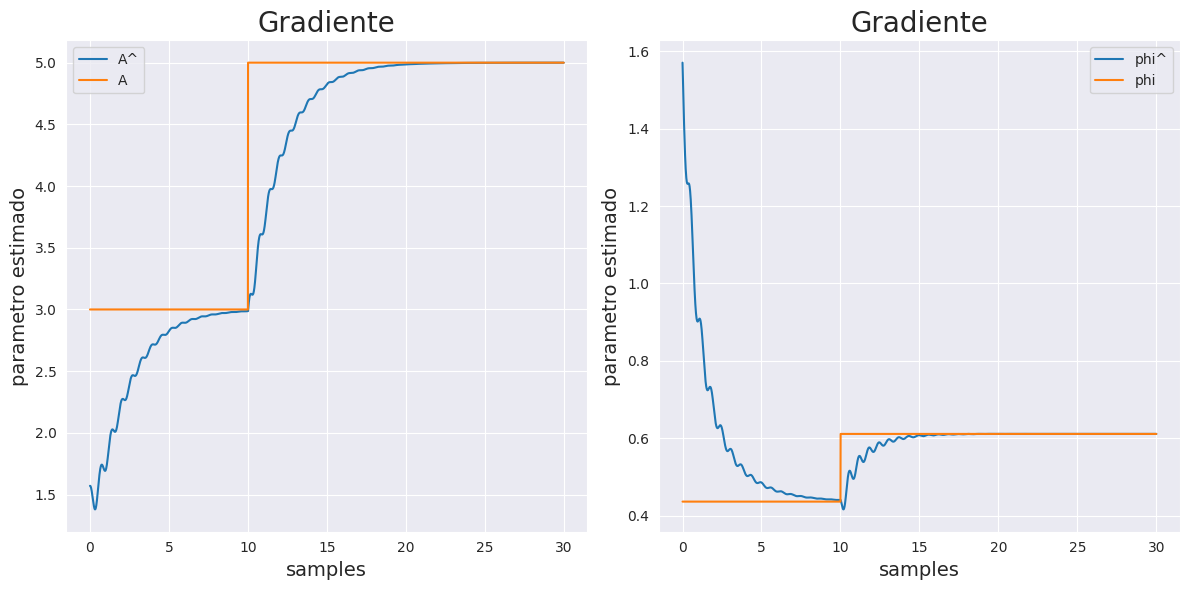

In [ ]:
# Gráfico dos parâmetros identificados e do erro

# Crie uma figura com 1 linha e 2 colunas para os subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

corte = int(np.ceil(1*len(theta[0])))

fontesize = 14
titlesize = 20
# Primeiro subplot (Gráfico dos parâmetros estimados)
axs[0].plot(T[:corte], Aest[:corte], label='A^')
axs[0].plot(T[:corte], A[0][:corte], label='A')
axs[0].legend()
axs[0].set_xlabel('samples', fontsize=fontesize)
axs[0].set_ylabel('parametro estimado', fontsize=fontesize)
axs[0].set_title('Gradiente', fontsize=titlesize)

# Segundo subplot 
axs[1].plot(T[:corte], phiest[:corte], label='phi^')
axs[1].plot(T[:corte], phi[0][:corte], label='phi')
axs[1].legend()
axs[1].set_xlabel('samples', fontsize=fontesize)
axs[1].set_ylabel('parametro estimado', fontsize=fontesize)
axs[1].set_title('Gradiente', fontsize=titlesize)
# Ajuste o espaço entre os subplots
plt.tight_layout()

# Exiba os subplots lado a lado
plt.show()

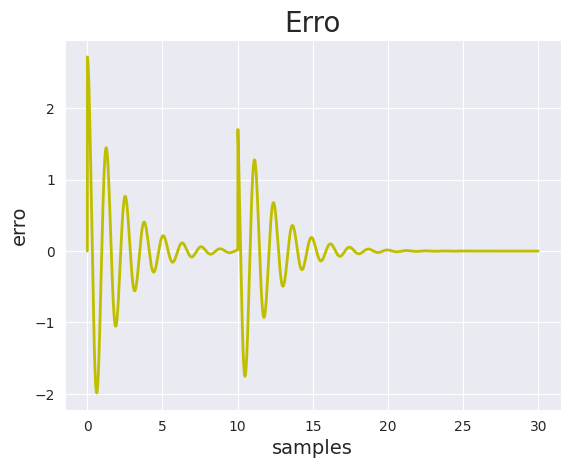

In [ ]:
# Segundo subplot (Gráfico do erro)
plt.plot(T[:corte], erro[:corte], 'y', linewidth=2)
plt.xlabel('samples', fontsize=fontesize)
plt.ylabel('erro', fontsize=fontesize)
plt.title('Erro', fontsize=titlesize)
plt.grid(True)

# Exiba o gráfico
plt.show()  
